<a href="https://colab.research.google.com/github/Yomunozs/Senales_Sistemas/blob/main/Parcial2/parcial_2_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<font color='magenta'>#######################################################################################################</font>
# <font color='blue'>Numeral 2.1</font>


<font color='green'>**Se trabaja apartir de varios cuadernos de apoyo 1_SerieFourier_Exp_Tri_compacta.ipynb, ...**</font>


<font color='green'>**Primero se definen los parametros definidos en el enunciado**</font>


wo= 1.0
Fo= 1.5707963267948966


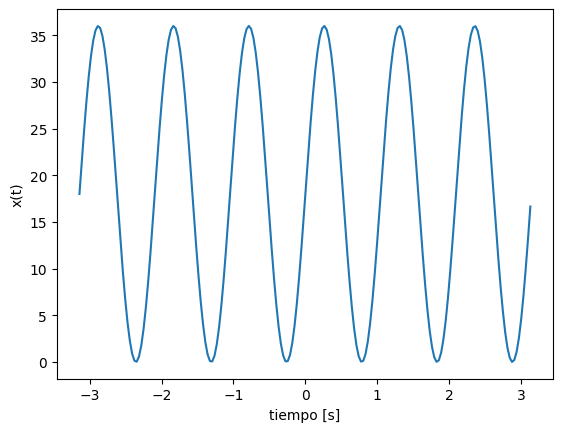

In [125]:
#Librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

#Del rango definido pata t
ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 20*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo apartir del periodo evaluado

#Por facilidad de calculos se tiene varias formas de representar la misma señal
x1 = abs(6*np.sin((3*tv) + (np.pi/4)))**2 #señal de entrada original
x = 18+18*np.sin(6*tv)#Aplicando identidades trigonometricas y expandiendo
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()

<font color='green'>**Se demuestra que las señales anteriores son equivalentes**</font>


In [126]:
if x.all() == x1.all(): #Se evalua si los valores de las señales son iguales entre si
  print("la señales son equivalentes")

la señales son equivalentes


<font color='green'>**Para seguir con el analisis, se crean las bases de fourier**</font>


In [127]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 20 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

<font color='green'>**Se grafican las bases de fourier**</font>


In [128]:
# graficar bases
from ipywidgets import interact,IntSlider

def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{(t)}")# Parte real que corresponde al coseno
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{(t)}")#Parte imaginaria que corresponde al seno
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=20, min=-20), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>



```
# Esto tiene formato de código
```

<font color='green'>**En esta parte del codigo se reemplazan los valores de los pesitos calculados teoricamente, ajustando los subindices segun los resultados obtenidos**</font>


In [129]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_) #Vector de pesitos
nv = np.linspace(-N, N, 2*N+1) #vector armónicos  eje x
cn[N] = 18 # nivel dc C_0
cn[N-6] = 9*1j #armónico -6, como se presentan indeterminaciones el las ecuaciones de Cn cuando n es igual a 6 y -6, se calculan de manera individual
cn[N+6] = -9*1j #armónico +6
#Para el resto de armonicos cn es cero

<font color='green'>**Se grafican las componentes del espectro de cn, parte real, parte imaginaria, fase y magnitud**</font>


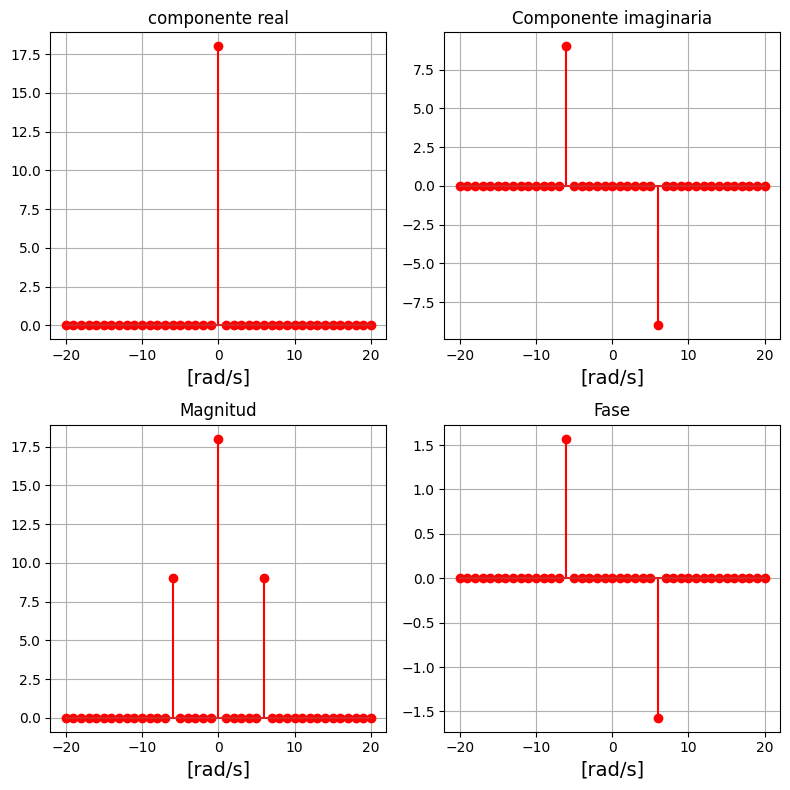

In [130]:
#graficar espectro
#Parte real
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.title(r'componente real')
plt.xlabel(r'[rad/s]',fontsize = 14)
plt.ylabel(r'',fontsize = 14)
plt.axis('tight')
plt.grid()

#Parte imaginaria
plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.title(r'Componente imaginaria')
plt.xlabel(r'[rad/s]',fontsize = 14)
plt.ylabel(r'',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.title(r'Magnitud')
plt.xlabel(r'[rad/s]',fontsize = 14)
plt.ylabel(r'',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.title(r'Fase')
plt.xlabel(r'[rad/s]',fontsize = 14)
plt.ylabel(r'',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

<font color='green'>**Se grafican las resconstruccion a partir del calculo del error relativo, la potencia de la señal se calcula teoricamente y se reemplaza en el codigo**</font>

In [131]:
#graficar reconstrucción

Px = 486 # potencia señal x(t), calculada
def pltest(Na=1):#Funcion para interactuar con la cantidad de armonicos
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px# Formula del error relativo
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='') #señal original
    plt.title('E_r=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

<font color='magenta'>#######################################################################################################</font>
# <font color='blue'>Numeral 2.2</font>


<font color='green'>**Se trabaja apartir de varios cuadernos de apoyo youtube_detector.ipynb, 4_ModulacioAM,ipynb,...**</font>



<font color='green'>**La primera parte consiste en obtener el tramo de cancion especificado del segundo 20 al 25. El ccual va a ser el mensaje a modular en amplitud.**

**En esta parte se utiliza parte del codigo generado para el detector de genero y del cuaderno de ayuda sobre modulacion AM**</font>


In [132]:
#se instalan librerias necesarias
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile #instalar sondfile

import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import yt_dlp as youtube_dl
import subprocess
import os
import soundfile as sf # para instalar pip install soundfile




  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.47.0-py3-none-any.whl (194 kB)
  Using cached pycryptodomex-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-12.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.0 MB)
  Using cached charset_normalizer-3.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (139 kB)
  Using cached idna-3.4-py3-none-a

In [133]:
#funcion para descargar mp3 desde youtube, definida en cuadernos de guia anteriores
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

cancion = "https://youtu.be/3YxaaGgTQYM?si=g5VHXSkOv5uv-UDk"# cancio escogida
download_ytvid_as_mp3(cancion,"cancion") # se utiliza la funcion para descargar la cancion de youtube

cancion = "cancion"#Se define la variable que va a contener la cancion
subprocess.call(['ffmpeg','-y', '-i', cancion+'.mp3',
                   cancion+'.wav'])#Se cambia el formato a uno mas completo

#leer la cancion, para determinar su valor en terminos computacionales y determinar la frecuencia de muestreo utilizada por el origen
nombre_out = "cancion.wav"
x, fs = sf.read(cancion+'.wav')#x datos de la canción, fs frecuencia de muestreo de la cancion



[youtube] Extracting URL: https://youtu.be/3YxaaGgTQYM?si=g5VHXSkOv5uv-UDk
[youtube] 3YxaaGgTQYM: Downloading webpage
[youtube] 3YxaaGgTQYM: Downloading ios player API JSON
[youtube] 3YxaaGgTQYM: Downloading android player API JSON
[youtube] 3YxaaGgTQYM: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=3YxaaGgTQYM
[youtube] 3YxaaGgTQYM: Downloading webpage
[youtube] 3YxaaGgTQYM: Downloading ios player API JSON
[youtube] 3YxaaGgTQYM: Downloading android player API JSON
[youtube] 3YxaaGgTQYM: Downloading m3u8 information
[info] 3YxaaGgTQYM: Downloading 1 format(s): 251
[download] cancion.mp3 has already been downloaded
[download] 100% of    3.81MiB


In [134]:
fs #valor de fs

48000

<font color='green'>**Ahora, se adecua la cancion y se toma el tramo para modular**</font>


In [135]:

xcopia = x.copy() #copiar archivos para procesar,sin afectar la cancion
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xcopia[int(ti*fs):int((tf*fs)),0] #Se obtiene el mensaje requerido
from IPython.display import Audio #reproducir segmento
Audio(m.T,rate=fs)


<font color='green'>**Se presenta en graficas la composicion del tramo selecccionado y su apariencia antes de ser modulada**</font>


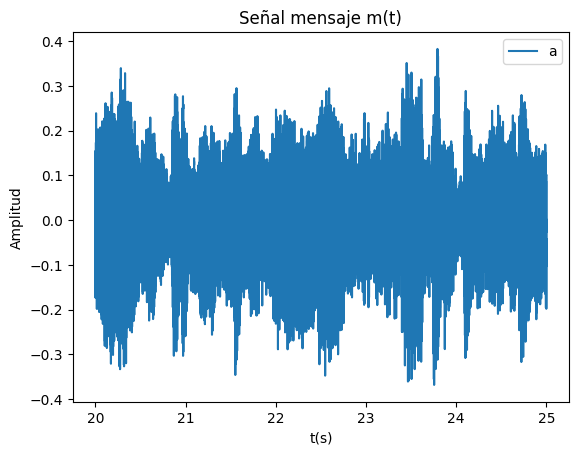

In [136]:
#Señal mensaje en función del tiempo
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.title(r'Señal mensaje m(t)')
plt.xlabel('t(s)')
plt.ylabel('Amplitud')
plt.legend("amplitud vs tiempo")
plt.show()

<font color='green'>**Teniendo en cuenta el procedimiento para modulacion de mensajes, se calcula la transformada de fourier del mensaje y se grafica su espectro**</font>

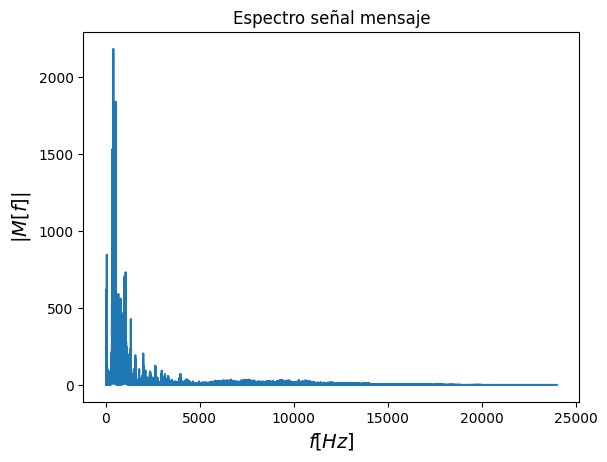

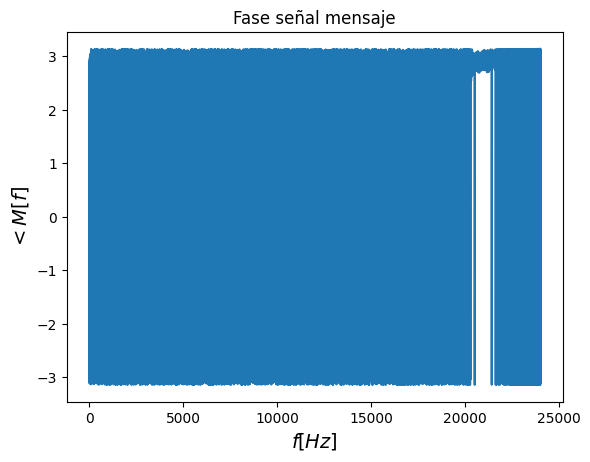

In [137]:

#Fourier por medio de rfft
Mw = np.fft.rfft(m) # luego de la fransformada, el mensaje queda en terminos de frecuencia
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.title(r'Fase señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

<font color='green'>**La grafica se ve saturada debido a que la frecuencia de muestreo es muy elevada**

**a partir de las graficas se puede determinar una frecuencia portadora adecuado para el mensaje a enviar**</font>

In [138]:
Fc = 20000 #la frecuencia portadora debe ser >> que fmax del mensaje
Im = 1 # de la ecuacion de Im se despeja Ac sabiendo que el indice de modulacion esta en 1, asi:Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*tt) #portadora, se toma laseñal portadora del ejercicio practico.

In [139]:
#repoducir portadora
Audio(c,rate=fs)#Como es  una frecuencia nuyy alta se escucha un sonido muy agudo

<font color='green'>**Se grafica la señal portadora**</font>

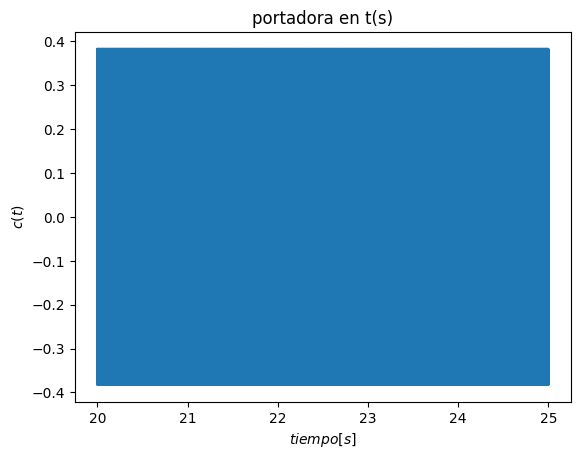

In [140]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal en el tiempo
plt.title(r'portadora en t(s)')
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

<font color='green'>**Tambien se calcula la transformada dr fourier de la señal portadora**</font>

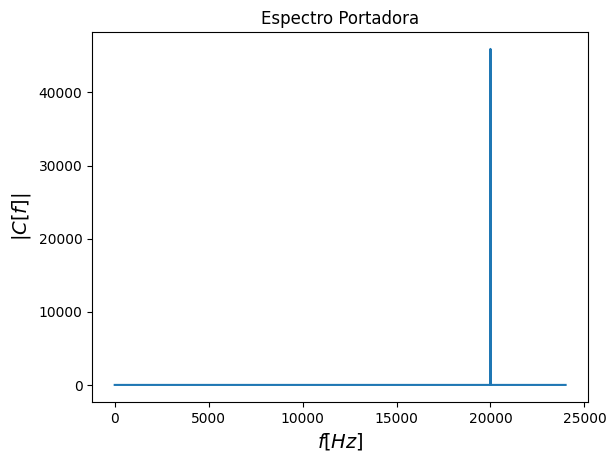

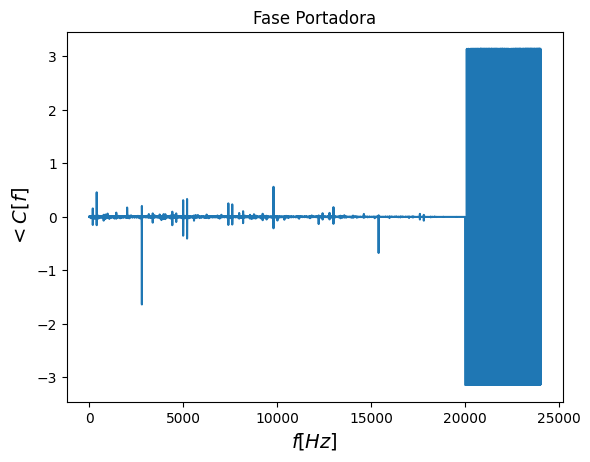

In [141]:
#Fourier señal portadora
Cw = np.fft.rfft(c)
plt.plot(vf,abs(Cw))#se grafica la magnitud de la señal portadora
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro con la fucion angle() de numpy
plt.title(r'Fase Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

<font color='green'>**Teniendo el mensaje y la portadora, se puede calcular la señal modulada antes de meter los datos en la transformada de fourier, asi**</font>


In [142]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

<font color='green'>**Ahora si, se calcula su transformada de fourier y se obtiene el mensaje modulado en amplitudy se grafica su forma en frecuencia y en fase**</font>


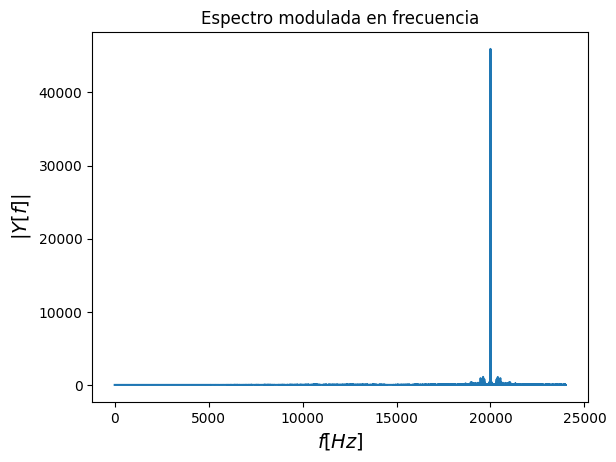

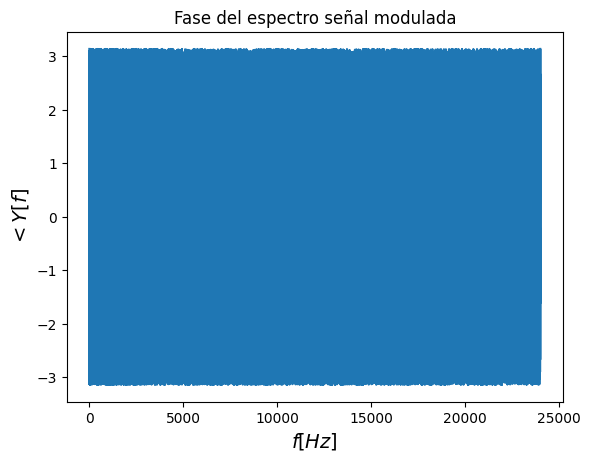

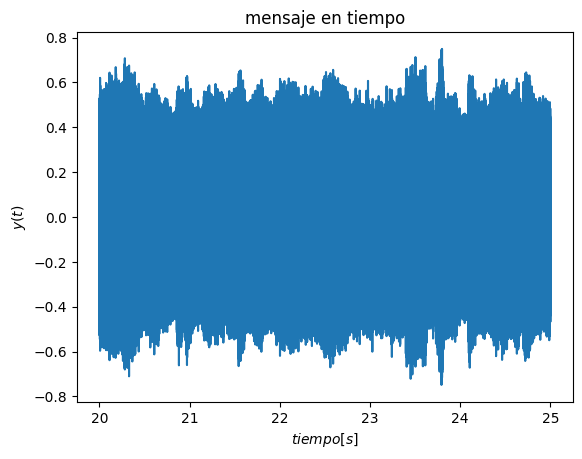

In [143]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # Se calcula la rfft de y
#Vf = np.fft.rfftfreq((y.shape[0],1/fs))
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada en frecuencia')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro con la funcion angle() de numpy
plt.title(r'Fase del espectro señal modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

plt.plot(tt,y) #graficar señal  en el tiempo
plt.title(r'mensaje en tiempo')
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

<font color='green'>**Por ultimo se hace una comparacion entre el espectro en frecuencia de las tres señales manejadas en el ejercicio**</font>


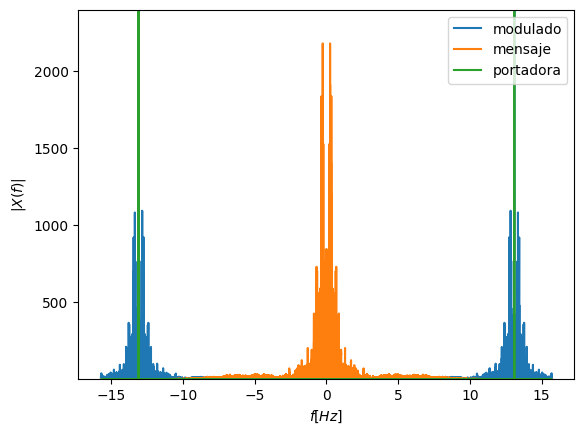

In [144]:
Xfc = np.fft.fft(c)#Señal portadora
Xfm = np.fft.fft(m)#Señal mensaje
Xfy = np.fft.fft(y)#Señal modulada

vfre = np.fft.fftfreq(len(c),1/Fs)#vector de datos en frecuencia

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

<font color='green'>**Se evidencia en la grafica el espectro en frecencia de las señales, siendo la del centro la del mensaje con amplitud inferior y las de los lados, componentes de la señal modulada**</font>


<font color='magenta'>#######################################################################################################</font>
# <font color='blue'>Numeral 2.3</font>


<font color='green'>**Se trabaja apartir de cuaderno de apoyo WesterP2_2023_2.ipynb**</font>



# Case Western Reserve Experiments


Sea la base de datos para el monitoreo de condición (fallos) en rodamientos a partir del análisis de vibraciones descrita en [Case Western Reserve Experiments](https://engineering.case.edu/bearingdatacenter). Las señales fueron adquiridas para las siguientes condiciones (clases): i) Normal bearing (Nor), fault in the internal train (IR1), fault in the external train (IR2), and fault in the rolling element-ball (BE). Además, los fallos se generaron para tres niveles de severidad (profundidad): 0.007′′, 0.014′′, and 0.021′′ y tres velocidades de operación (1730, 1750, 1772, and 1797 [rpm]). Los datos fueron adquiridos a 12 kHz. Por consiguiente, se tienen los siguientes parámetros de estudio: $F_s=12k$ [Hz] cantidad de puntos en el tiempo $4096$ y cantidad de clases $C = 10$.

Grafique la señal promedio de cada fallo en el tiempo y en la frecuencia.

Utilizando la transformada rápida de Fourier diseñe y construya un detector fallos en rodamientos a partir de señales de vibración y sus etiquetas en los arreglos Xtrain y Ytrain (ver cuaderno de apoyo). Genere las predicciones de fallos para el arreglo Xtest.

In [145]:
#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

--2023-10-28 04:18:20--  https://docs.google.com/uc?export=download&confirm=t&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 172.253.122.113, 172.253.122.100, 172.253.122.139, ...
Connecting to docs.google.com (docs.google.com)|172.253.122.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/52e87hln4tfse8vnebl6vifplrqiiqqp/1698466650000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=6e7ab519-179f-4fb3-b4c2-fce957801e52 [following]
--2023-10-28 04:18:20--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/52e87hln4tfse8vnebl6vifplrqiiqqp/1698466650000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=6e7ab519-179f-4fb3-b4c2-fce957801e52
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 172.253.63.1

In [146]:
#librerias
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#cargar datos
path_ = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(path_)

In [147]:
Xt = dicX['F'] #datos en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos

labels_ = ['NOR','IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases


Xt shape: (1200, 4000)
tiempo [s] 0.3333333333333333


In [148]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue))

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


<font color='green'>**De el codigo original se tiene en la posicion Ytest = _, esto debido a que se ignora la etiqueta de las muestras que se desean identificar, en este desarollo se opta por asignar estas etiquetas en una variable que se usa unicamente al final de el este codigo para verifcar el funcionamiento de el detector de fallos**</font>




In [149]:
#partir datos para train y test
size=0.3 # Se asigna una variable a test_size para estandarizar la cantidad de muestras que se reparten de la base de datos dado que este valor se usa mas adelante en el codigo
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xt, Ytrue, test_size=size)#Ytest guarda las etiquetas originales de los datos de prueba
test=int(len(Xt)*size)
print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape},test {test} ")

Xtrain shape (840, 4000), Ytrain shape (840,)Xtest shape (360, 4000),test 360 


In [150]:
#calcular espectro de Fourier Xtrain
VF = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #freq vector, se usa para plotear
Xw = (abs(np.fft.rfft(Xtrain))) # FFT
VF.shape

(2001,)

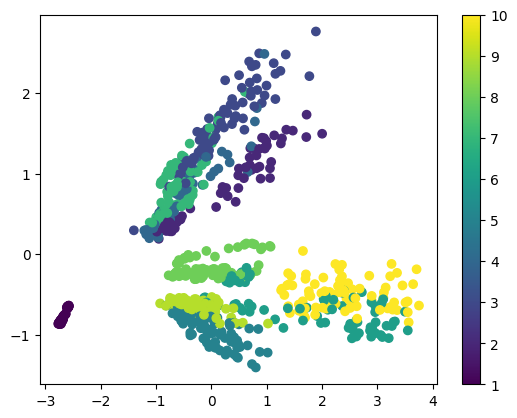

In [151]:
#graficar espectro para clases representativas
sca_ = MinMaxScaler()
Xw_ = sca_.fit_transform(Xw.T).T
#red = TSNE(perplexity = 15,n_components=2,random_state=123,learning_rate='auto',init='pca')
red = PCA(n_components=2)
Z = red.fit_transform(Xw_)

plt.scatter(Z[:,0],Z[:,1],c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

Señal promedio de cada clase
para tiempo se usa la matriz original y para frecuencias se usa la creada usando la trsanformadarapida de fourier



<font color='green'>**En el enunciado se solicita graficar las señales de los fallos en terminos de tiempo y frecuencia, para la grafica de tiempo, se utilizan la variable que contiene los datos en terminos de tiempo antes de que se calcule su rfft.**

**Para la grafica de frecuencia de utiliza los datos que se obtienen al creal el vector de frecuencias y el de los espectros en frecuencia por rfftfreq
 y rfft**</font>


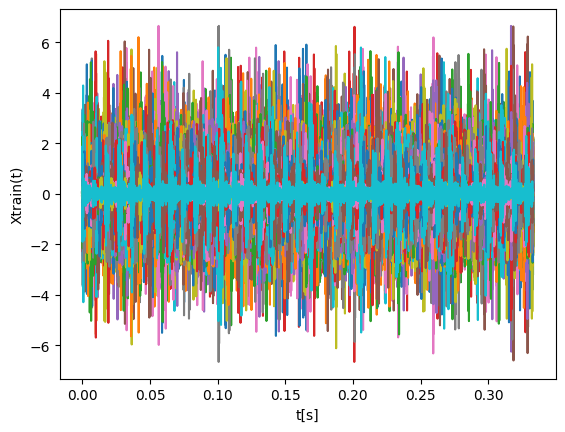

In [152]:
#grafica en tiempo
dtt = np.arange(0,Tl,1/Fs)#Datos de tiempo
plt.plot(dtt,Xtrain.T) #se toman los parametros iniciales para los valores de tiempo y el conjunto de señales train
plt.xlabel('t[s]')# Etiqueta eje x
plt.ylabel('Xtrain(t)') #Etiqueta eje y
plt.show()

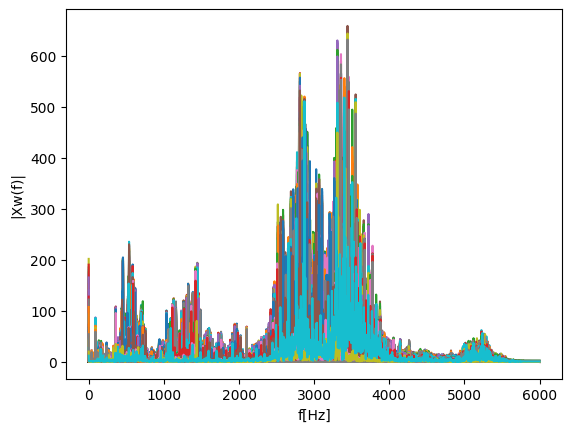

In [153]:
#Grafica de el espectro en frecuencia, se toman los valores evaluados con la rfft
plt.plot(VF,abs(Xw).T) # vf= frecuencias,ejex . Xw se toma e valor absoluto para determinar apropiadamente la amplitud y frecuencia de el espectro
plt.xlabel('f[Hz]')
plt.ylabel('|Xw(f)|')
plt.show()

<font color='green'>**Para la representacion de cada clase de fallo, se agrupan las muestra que comparten la misma clase, y se promedia sus valores para obtener la forma mas representativa del fallo, se grafica cada fallo respecto al tiempo y la frecuencia utilizando la rfft**</font>

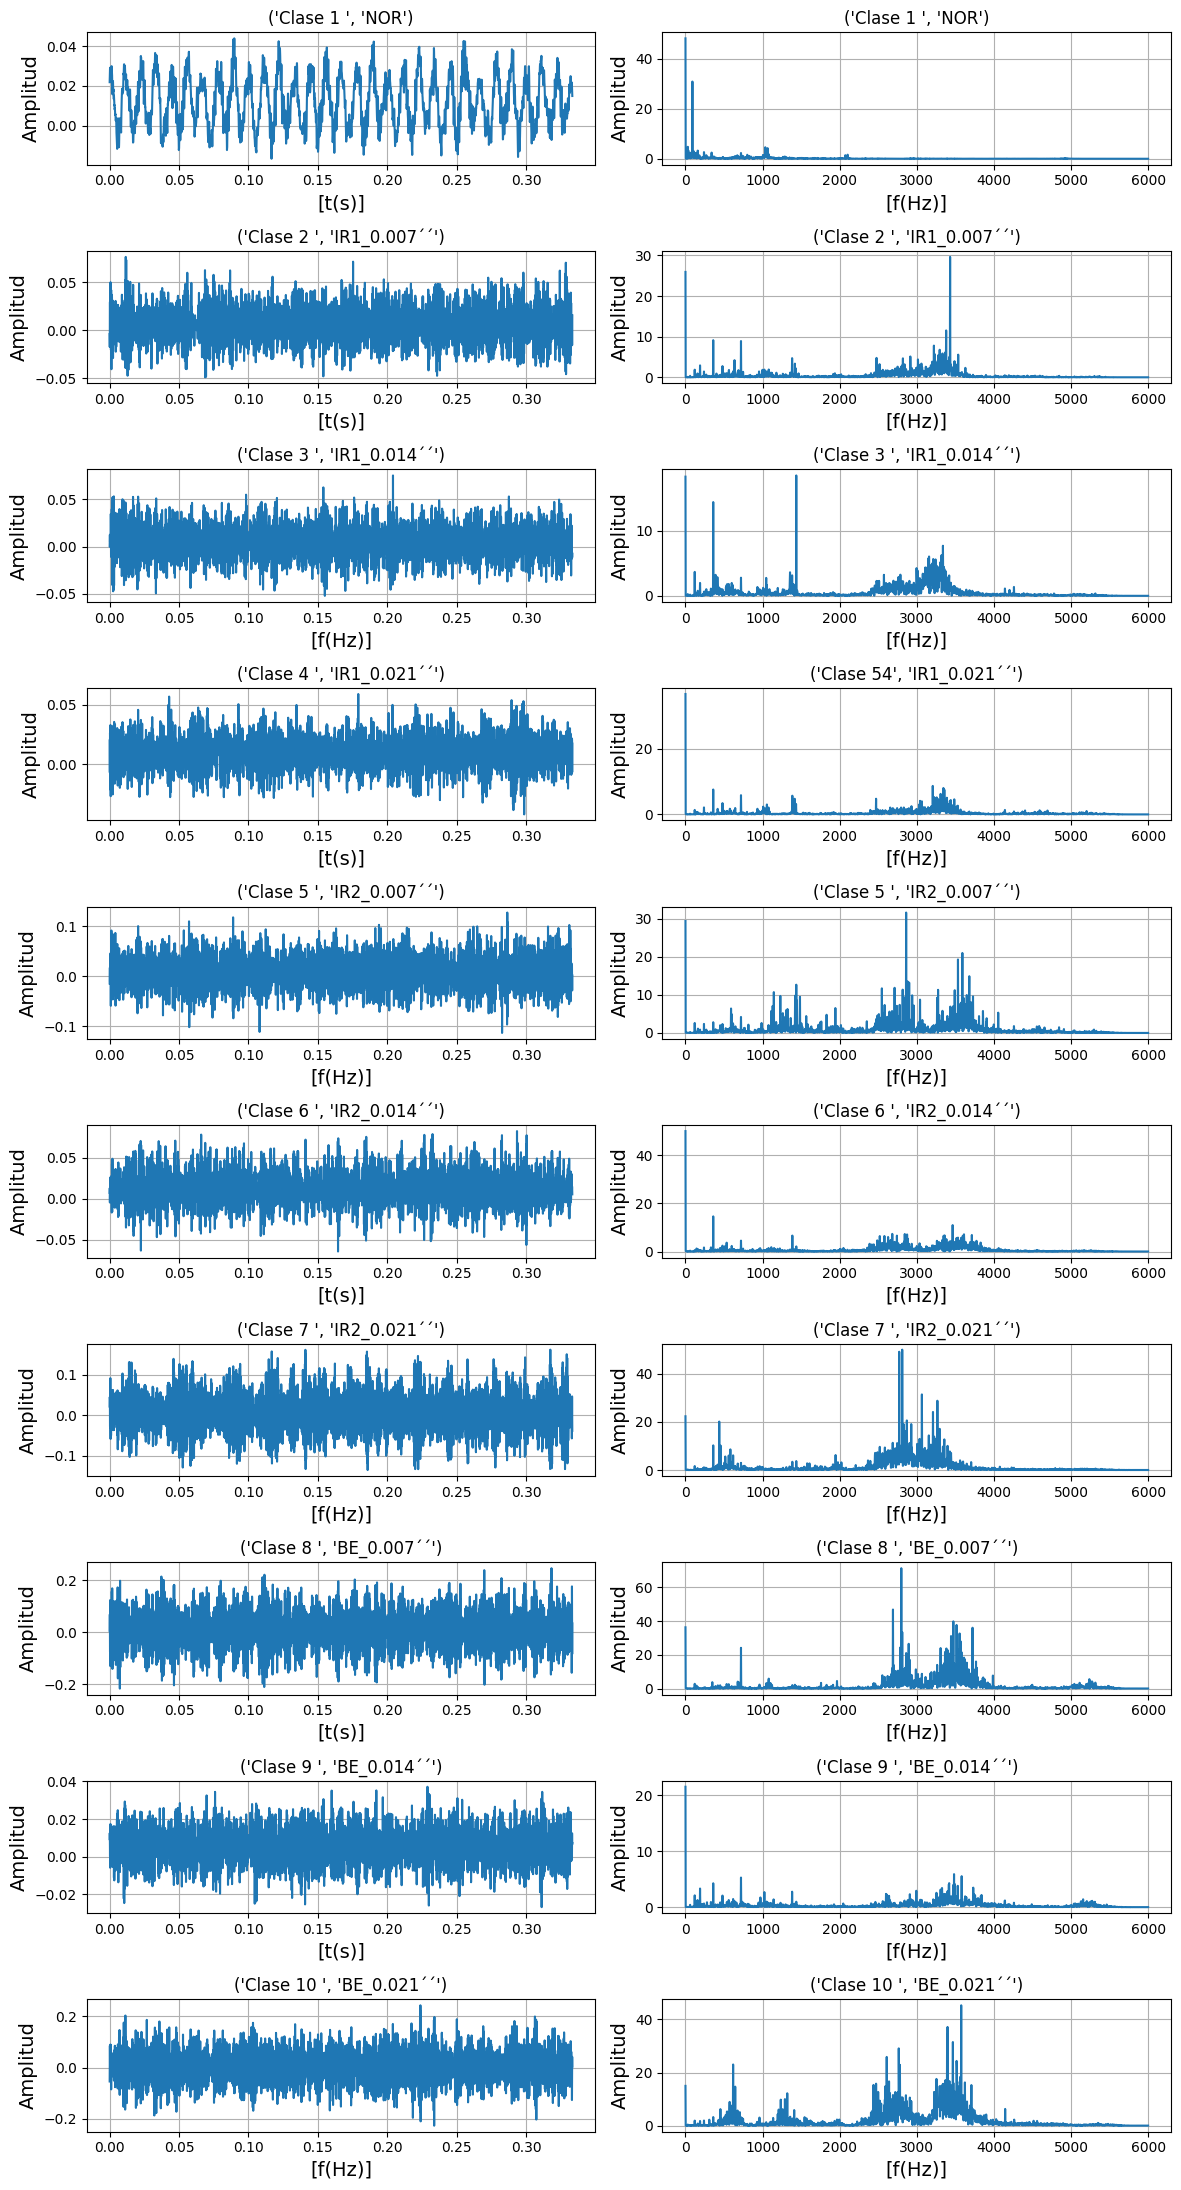

In [154]:
cl=len(labels_)#Cantidad de clases
tipo_de_clase=np.zeros((cl,4000))#Se crea una matriz para agrupar los fallos del mismo tipo
cantidad_por_clase=np.zeros((cl,))#Se crea una matriz para contar la cantidad de muestras en cada tipo
for l in range(len(Xtrain)):#Recorre la base de entrenamiento
  tipo_de_clase[Ytrain[l]-1] += Xtrain[l] #Suma las señales del mismo tipo
  cantidad_por_clase[Ytrain[l]-1] += 1 #Cuenta la cantidad de señales por tipo

for k in range(cl):# Recorre la cantidad de clases
  tipo_de_clase[k] /= cantidad_por_clase[k] #Calcula el promedio de cada tipo de clase

for j in range(cl): #Recorre la cantidad de clases
  tipo_de_clasew_ = (abs(np.fft.rfft(tipo_de_clase))) #Calcula la rfft de cada clase

#Señal en dominio del tiempo
fig = plt.figure(figsize=(12,22))#Tamaño de la grafica
plt.subplot(10,2,1)#Ubicacion en el mosaico
plt.plot(dtt, tipo_de_clase[0], )
plt.title((f'Clase 1 ',labels_[0]))
plt.xlabel(r'[t(s)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

#Señal en el dominio de la frecuencia...Se repite en la demas graicas
plt.subplot(10,2,2)
plt.plot(VF, tipo_de_clasew_[0].T, )
plt.title((f'Clase 1 ',labels_[0]))
plt.xlabel(r'[f(Hz)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(10,2,3)
plt.plot(dtt, tipo_de_clase[1], )
plt.title((f'Clase 2 ',labels_[1]))
plt.xlabel(r'[t(s)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(10,2,4)
plt.plot(VF, tipo_de_clasew_[1].T, )
plt.title((f'Clase 2 ',labels_[1]))
plt.xlabel(r'[f(Hz)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(10,2,5)
plt.plot(dtt, tipo_de_clase[2], )
plt.title((f'Clase 3 ',labels_[2]))
plt.xlabel(r'[f(Hz)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(10,2,6)
plt.plot(VF, tipo_de_clasew_[2].T, )
plt.title((f'Clase 3 ',labels_[2]))
plt.xlabel(r'[f(Hz)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()


plt.subplot(10,2,7)
plt.plot(dtt, tipo_de_clase[3], )
plt.title((f'Clase 4 ',labels_[3]))
plt.xlabel(r'[t(s)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(10,2,8)
plt.plot(VF, tipo_de_clasew_[3].T, )
plt.title((f'Clase 54',labels_[3]))
plt.xlabel(r'[f(Hz)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(10,2,9)
plt.plot(dtt, tipo_de_clase[4], )
plt.title((f'Clase 5 ',labels_[4]))
plt.xlabel(r'[f(Hz)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(10,2,10)
plt.plot(VF, tipo_de_clasew_[4].T, )
plt.title((f'Clase 5 ',labels_[4]))
plt.xlabel(r'[f(Hz)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()


plt.subplot(10,2,11)
plt.plot(dtt, tipo_de_clase[5], )
plt.title((f'Clase 6 ',labels_[5]))
plt.xlabel(r'[t(s)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(10,2,12)
plt.plot(VF, tipo_de_clasew_[5].T, )
plt.title((f'Clase 6 ',labels_[5]))
plt.xlabel(r'[f(Hz)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(10,2,13)
plt.plot(dtt, tipo_de_clase[6], )
plt.title((f'Clase 7 ',labels_[6]))
plt.xlabel(r'[f(Hz)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(10,2,14)
plt.plot(VF, tipo_de_clasew_[6].T, )
plt.title((f'Clase 7 ',labels_[6]))
plt.xlabel(r'[f(Hz)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(10,2,15)
plt.plot(dtt, tipo_de_clase[7], )
plt.title((f'Clase 8 ',labels_[7]))
plt.xlabel(r'[t(s)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(10,2,16)
plt.plot(VF, tipo_de_clasew_[7].T, )
plt.title((f'Clase 8 ',labels_[7]))
plt.xlabel(r'[f(Hz)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()


plt.subplot(10,2,17)
plt.plot(dtt, tipo_de_clase[8], )
plt.title((f'Clase 9 ',labels_[8]))
plt.xlabel(r'[t(s)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(10,2,18)
plt.plot(VF, tipo_de_clasew_[8].T, )
plt.title((f'Clase 9 ',labels_[8]))
plt.xlabel(r'[f(Hz)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(10,2,19)
plt.plot(dtt, tipo_de_clase[9], )
plt.title((f'Clase 10 ',labels_[9]))
plt.xlabel(r'[f(Hz)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(10,2,20)
plt.plot(VF, tipo_de_clasew_[9].T, )
plt.title((f'Clase 10 ',labels_[9]))
plt.xlabel(r'[f(Hz)]',fontsize = 14)
plt.ylabel(r'Amplitud',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

<font color='green'>**Para poder comparar los datos de prueba es necesario acondicionarlos de manera que queden con las mismas propiedades que los datos de muestra, para esto es necesario calcular su transformada de fourier y normalizarlos**</font>

In [157]:
#Se tiene el arreglo con las señales para etiquetar
#Se le aplica fourier para tener su espectro
vft = np.fft.rfftfreq(Xtest.shape[1],1/Fs) #Vector de frecuencias, se usa para graficar
Xwt = (abs(np.fft.rfft(Xtest))) # FFT
Xwt.shape #Dimensiones del nuevo arreglo

(360, 2001)

In [158]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
Xwt_ = sca_.fit_transform(Xwt.T).T

<font color='green'>**A continuacion, dado que se tienen todos los datos en iguales composiciones. se procede a comparar la matriz con los fallos de pruba con la matriz que contiene los fallos o estados de muestra**

**Se utiliza parte del codigo o la logica formulada para el detector de genero de youtube en el cuaderno de Youtube_detector.ipynb**</font>

In [159]:
from scipy.spatial.distance import cdist #Librerias necesarias
Ytest1=[] #Se crea la list que va a almacenar la etiqueta del fallo evaluado
for i in range(test): #Ciclo para recorrer los fallos contenidos en el arreglo de prueba, se utiliza la cantidad de datos de prueba definidos en la funcion de train_test_split()
  d=cdist(Xwt_,Xw_)# La funcion cdist calcula el parecido entre un valor de el primer arreglo cntra todos los valores del segundo, siendo el valor minimo el mas parecido
  ind = np.argmin(d[i,])#Se toma la ubicación de el valor minimo calculado en la linea anterior
  Ytest1.append(Ytrain[ind])#Se obtiene el tipo de fallo en la lista de etiquetas de la base a partir del l posicion del valor minimo, se agrega en orden a la lista


<font color='green'>**Se utiliza el vector "label" que contiene la nomenclatura de los tipos de fallos para asignar el nombre a los fallos identificados en la celda anterior**</font>

In [160]:
# Preguntar especificamente por un una señal de la prueba
numero_de_prueba = 1
print("Resultado del analisis: ",Ytest1[numero_de_prueba],"=",labels_[Ytest1[numero_de_prueba]-1])# Relaciona el numero de fallo con el tipo de fallo
# -1 porque losfallos estan codificados de 1 a 10 pero python indexa desde el numero 0

Resultado del analisis:  2 = IR1_0.007´´


In [161]:
labels_

['NOR',
 'IR1_0.007´´',
 'IR1_0.014´´',
 'IR1_0.021´´',
 'IR2_0.007´´',
 'IR2_0.014´´',
 'IR2_0.021´´',
 'BE_0.007´´',
 'BE_0.014´´',
 'BE_0.021´´']

<font color='green'>**Como se menciono anteriormente, se usan las etiquetas originales para determinar la eficiencia del codigo**</font>

In [162]:
Aciertos = 0
Fallos = 0
for i in range(len(Ytest)):#Recorre el arreglo de etiquetas
  if Ytest[i] == Ytest1[i]:#Compara etiquetas originales y obtenidas a partir de la detección
    Aciertos += 1
  else:
    Fallos += 1
print("Aciertos: ",Aciertos, "Fallos",Fallos)

Aciertos:  360 Fallos 0


In [163]:

#Ytest1
